# Singular Values Decomposition and Images

In this project, we use the Singular Value Decomposition (SVD) to analyze a matrix which represents a picture and represent the picture using fewer than all of the singular values. 

First, we will import an image of a racoon and save it to our local directory (within Colab).

In [100]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [101]:
#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [102]:
#  Read in face image:
origImg = misc.face()
origImg.shape, origImg.dtype
#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[100][100]

array([94, 82, 92], dtype=uint8)

#  1.  The code below is used to adjust the number of singular values used within the image.

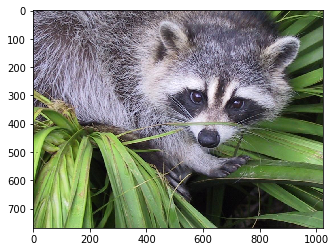

In [103]:
#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

In [104]:
#  We'll split the array of colors into three separate matrices:

#  The code below makes a copy of the color data in copyImg[i][j][0] 
#  and puts it into r_image[i][j][0], but leaves the other two colors blank.

#  First, make a matrix to hold the data for the first color.
#(rows, columns, colors) = copyImg.shape

#  Then, copy over the color data:
#r_image = np.random.randn(rows, columns)
#for i in range(rows):
#    for j in range(columns):
#        r_image[i][j] = copyImg[i][j][0]

#  This is a faster way of doing that same code:
r_image = copyImg[:, :, 0]
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]
#  YOU:  creage a g_image and a b_image matrix which contains data for the green and blue pixels.



In [105]:
# decompose the matrix a, representing the color 0, using SVD:
Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

# YOU:  do the same for the other two colors:
Ug, sg, Vhg = linalg.svd(g_image)
Ug.shape, sg.shape, Vhg.shape
Mg,Ng = g_image.shape
Sigg = linalg.diagsvd(sg,Mg,Ng)

Ub, sb, Vhb = linalg.svd(r_image)
Ub.shape, sb.shape, Vhb.shape
Mb,Nb = b_image.shape
Sigb = linalg.diagsvd(sb,Mb,Nb)



In [106]:
# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()
SSigg = Sigg.copy()
SSigb = Sigb.copy()
# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 5
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0

ZeroAfter = 5
ZeroTo = min(SSigg.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigg[i][i] = 0
    
ZeroAfter = 5
ZeroTo = min(SSigb.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigb[i][i] = 0
# YOU: Modify the code above to do the same thing for the other two colors.


In [107]:
SSigg[0][0]

106817.38

In [108]:
# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))
new_g_image = Ug.dot(SSigg.dot(Vhg))
new_b_image = Ub.dot(SSigb.dot(Vhb))
# YOU:  Do this for the other two colors:

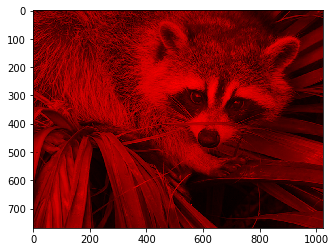

In [132]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,0] = new_r_image

# YOU:  Modify the code above to pack the data for the other two colors:
'''
Used later to answer question 1

question_1_img = origImg.copy()
question_1_img.fill(0)
question_1_img[:,:,0] = new_r_image

Used later to answer question 2

question_2_img = origImg.copy()
question_2_img.fill(0)
question_2_img[:,:,0] = new_r_image

Used later to answer question 3

question_3_img_list = []
for zero_after in [1, 5, 10, 20, 25]:
    SSigr = Sigr.copy()
    ZeroTo = min(SSigr.shape) - 1
    for i in range(zero_after,ZeroTo):
        SSigr[i][i] = 0
        
    new_r_image = Ur.dot(SSigr.dot(Vhr))   
    
    question_3_img = origImg.copy()
    question_3_img.fill(0)
    question_3_img[:,:,0] = new_r_image
    question_3_img_list.append(question_3_img)
'''
question_5_img_list = []
for zero_after in [100,150,200,250,300]:
    SSigr = Sigr.copy()
    ZeroTo = min(SSigr.shape) - 1
    for i in range(zero_after,ZeroTo):
        SSigr[i][i] = 0
        
    new_r_image = Ur.dot(SSigr.dot(Vhr))   
    
    question_5_img = origImg.copy()
    question_5_img.fill(0)
    question_5_img[:,:,0] = new_r_image
    question_5_img_list.append(question_5_img)

plt.imshow(newImg, origin='upper')

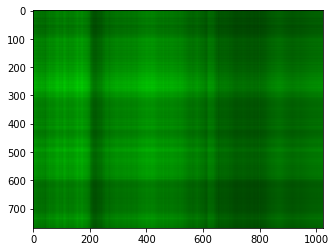

In [135]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,1] = new_g_image

# YOU:  Modify the code above to pack the data for the other two colors:

plt.imshow(newImg, origin='upper')

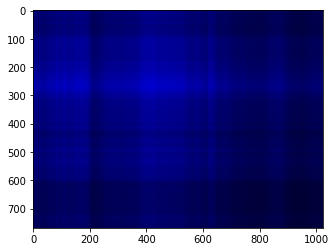

In [136]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,2] = new_b_image

# YOU:  Modify the code above to pack the data for the other two colors:

plt.imshow(newImg, origin='upper')

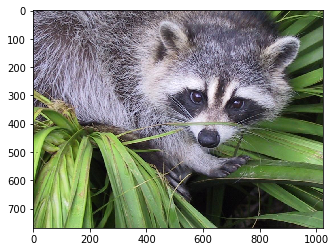

In [12]:
#Original image:
plt.imshow(copyImg, origin='upper')

In [13]:
#  save the image to your directory
filename = f'face_svd_{str(ZeroAfter)}.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

# Question 0:
How large is the original picture? ( size depends on rows, columns, and colors)

How large is the SVD decomposition? (size depends on number of svds, number of eigenvectors used and size of matrices & and Vh, and number of colors)

How do these sizes compare?

In [17]:
origImg.shape

(768, 1024, 3)

In [21]:
Ur.shape

(768, 768)

In [29]:
Sigr.shape

(768, 1024)

In [23]:
Vhr.shape

(1024, 1024)

In [55]:
origImg.shape

(768, 1024, 3)

In [20]:
print(new_b_image.shape)
print(new_g_image.shape)
print(new_r_image.shape)

(768, 1024)
(768, 1024)
(768, 1024)


In [ ]:
'''
The original image is of size 768 x 1024 x 3 as height, width, and color dimensions, respectively.

Each singular value decomposition is 2 dimensional, 768 x 1024 width and height dimensions. Though, it could also be
described equivalently as a 3 dimensional size, 768 x 1024 x 1, width, height, and color dimensions, where the color
dimension is of size 1, containing only a single desired color of the 3 colors in the original image. For example, the
new_b_image SVD contains the same width and height dimensions as the original, but only includes the amount of blue of 
each pixel from what was originally an RGB color dimension.

It is important to note the image compression property this image exhibits. For example, when we 'Zero After' 5 singular
values
'''

# Question 1:
What do you expect to see if we use just 1 singular value?

Did you see what you expected?

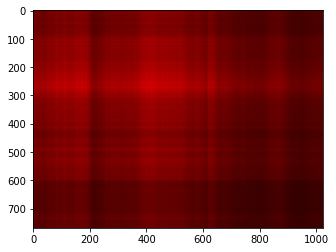

In [99]:
plt.imshow(question_1_img, origin='upper')

In [ ]:
'''
The image displayed above is using only one singular value. When I first read this question, my first reaction was that it
might be a solid colored image, but then further thinking through the multiplications I realized there are still variations
in that we are keeping the entire first column of U and the entire first column of Vh. Though, since they are all multiplied 
by only one singular value and the rest zeroed out, we see that almost all of the information is lost, and the image no 
longer resembles the original image whatsoever.
'''

# Question 2:
What do you expect to see if we use all of the singular value?

Did you see what you expected?

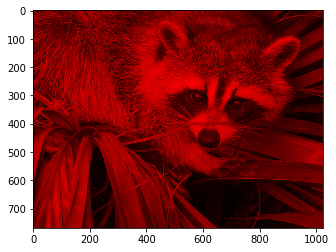

In [110]:
plt.imshow(question_2_img, origin='upper')

In [ ]:
'''
The image displayed above is using all singular values. This met my expectation, it is exactly the red color channel
of the original image. There is no lost information, when the SVD is multiplied through, the original red color channel
matrix is achieved. 
'''

# Question 3:
Create images using 1, 5, 10, 20, or 25 singular value. What happens to the image when we include more singular values?

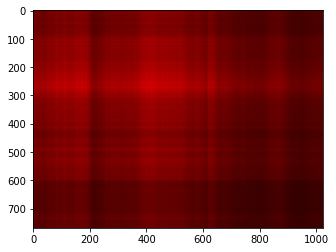

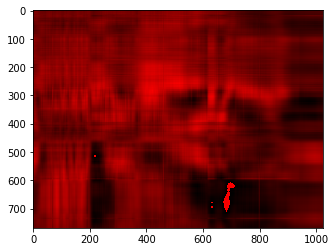

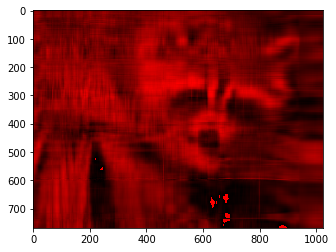

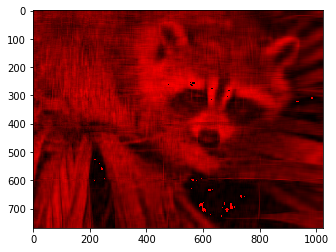

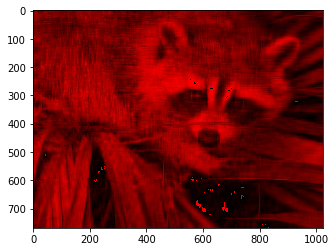

In [123]:
for img in question_3_img_list:
    plt.figure()
    plt.imshow(img)

In [ ]:
'''
Displayed above is a progression of images using the specified numbers of singular values. It is shown that the image gets
more and more detailed as a result of including more singular values. The quality of the
image as a function of the number of singular values seems to be something like a logarithmic function. That is, for example
the image quality improvement is much greater going from 1 to 5 singular values as compared to going from 20 to 25 singular
values.
'''

# Question 4:
How many singular values do you need before you can roughly understand the picture?

In [ ]:
'''
I think if I did not know the image is a racoon from the start, I would be able to identify it as a raccoon around 8 to 10 
singular values.
'''

# Question 5:
How many singular values do you need to include to eliminate the color artifacts in the image?

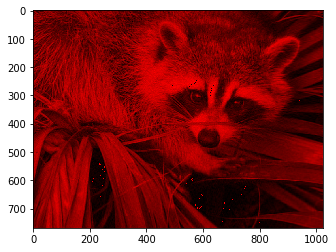

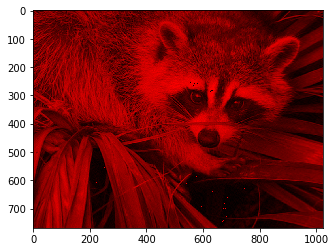

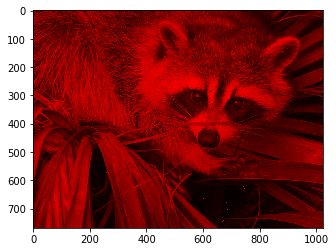

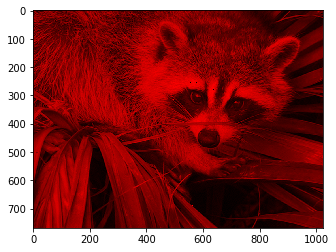

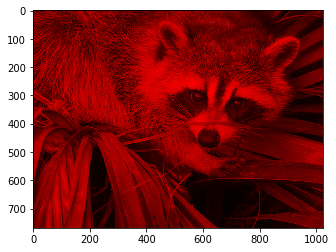

In [133]:
#images using 100,150,200,250,300 singular values, respectively
for img in question_5_img_list:
    plt.figure()
    plt.imshow(img)

In [ ]:
'''
The images displayed above are using 100,150,200,250,300 singular values, respectively. It appears the artifacts are just
barely visible using 250 singular values (above the raccoon's left eye), and completely disappear using 300 singular values. 
The answer lies somewhere between these two images.
'''

# Question 6:
What is the behaviour of the singular values?
The plot below shows each singular value on the horizontal axis, and the value of each singular value on the vertical axis. What does this plot tell you about the singular values?

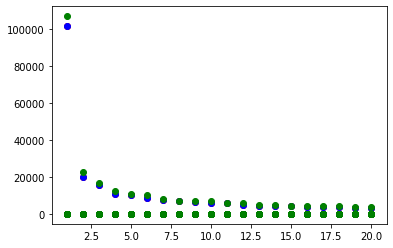

In [140]:
#  Plot the first NumberOfSigs singular values

#  Make this 768 or less:
NumberOfSigs = 20
x = np.linspace(1,NumberOfSigs,NumberOfSigs)
plt.plot(x,Sigr[0:NumberOfSigs], 'o', color='red');
plt.plot(x,Sigb[0:NumberOfSigs], 'o', color='blue');
plt.plot(x,Sigg[0:NumberOfSigs], 'o', color='green');


In [ ]:
'''
The quality of the image as a function of the number of singular values seems to be something like a logarithmic function. 
That is, for example the image quality improvement is much greater going from 1 to 5 singular values as compared to going 
from 20 to 25 singular values, and much less so going from 250 to 255 singular values.
'''